## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [2]:
import pandas as pd
import numpy as np

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [3]:
# your code here
url = 'https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv'
data = pd.read_csv(url)
data

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [4]:
data.isnull().sum()
# пропусков нет

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [5]:
quantitative = ['duration', 'amount', 'age']
binars = ['telephone', 'foreign_worker', 'credit_risk']
ordinal = ['employment_duration', 'installment_rate', 'savings', 'present_residence', 'people_liable', 'number_credits']
categorical = ['status', 'credit_history', 'purpose', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job']

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка `amount`) в каждой категории (колонка `purpose`), воспользовавшись методом `groupby`.

In [6]:
data.groupby(['purpose'])['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка `age`) снимает жилье (колонка `housing`)? А какой процент клиентов старше 40 лет снимает жилье?

In [7]:
print(f"процент клиентов моложе 30 лет, снимающих жилье: {(m := data[data['age'] < 30]['housing'].value_counts())['rent'] / m.sum()}")
print(f"процент клиентов старше 40 лет, снимающих жилье: {(m := data[data['age'] > 40]['housing'].value_counts())['rent'] / m.sum()}")

процент клиентов моложе 30 лет, снимающих жилье: 0.6666666666666666
процент клиентов старше 40 лет, снимающих жилье: 0.6801470588235294


### Задание 5 (0.5 балла)

 У скольких иностранцев (`foreign_worker`) число кредитов (`number_credits`) больше 3?

In [8]:
print(f"У стольких иностранцев число кредитов больше 3: {(data[data['number_credits'].isin(['4-5', '>= 6'])]['foreign_worker'] == 'yes').sum()}")

У стольких иностранцев число кредитов больше 3: 1


### Задание 6 (1 балл)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

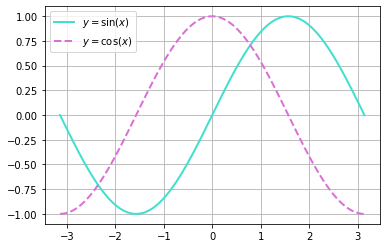

In [10]:
x = np.linspace(-np.pi, np.pi, 100)
plt.plot(x, np.sin(x), label=r'$y=\sin(x)$', color='turquoise', linewidth=2.0, linestyle='-')
plt.plot(x, np.cos(x), label=r'$y=\cos(x)$', color='orchid', linewidth=2.0, linestyle='--')
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

Это синус и косинус

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

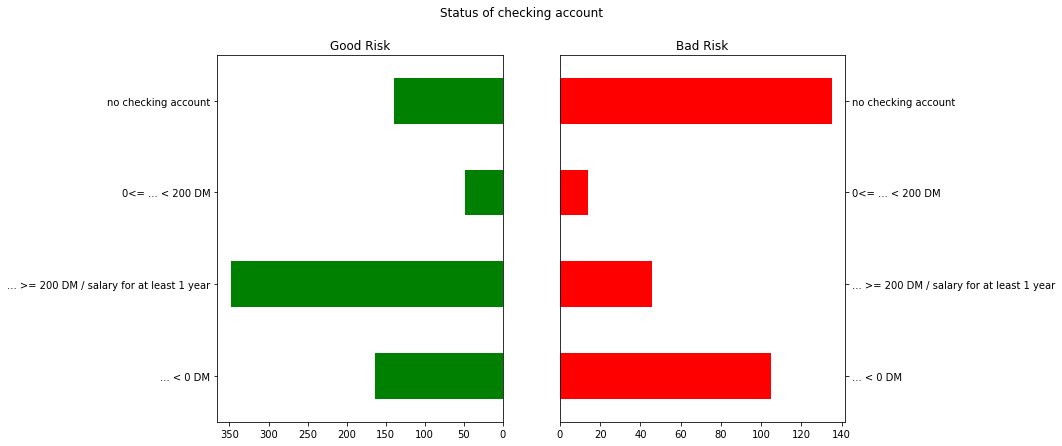

In [11]:
f, axes = plt.subplots(1, 2, figsize=(15 * 0.75, 9 * 0.75))
f.suptitle('Status of checking account')

data[data['credit_risk'] == 'good'].groupby(['status'])['credit_risk'].count().plot(kind='barh', ax=axes[0], color='green')
axes[0].set_ylabel(None)
axes[0].set_xlim(axes[0].get_xlim()[::-1])
axes[0].set_title('Good Risk')

data[data['credit_risk'] == 'bad'].groupby(['status'])['credit_risk'].count().plot(kind='barh', ax=axes[1], color='red')
axes[1].yaxis.tick_right()
axes[1].set_ylabel(None)
axes[1].set_title('Bad Risk');

На графике представлены гистограммы положительных и отрицательных кейсов. Видно, что, например для отрицательных резульатов преобладает количестово не проверенных счетов, тогда как для положительных результатов одобрения кредита - количесто всчетов, про которых известна хотя бы какая-то информация, значительно выше.  

### Задание 8  (0.5 балла)

In [12]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

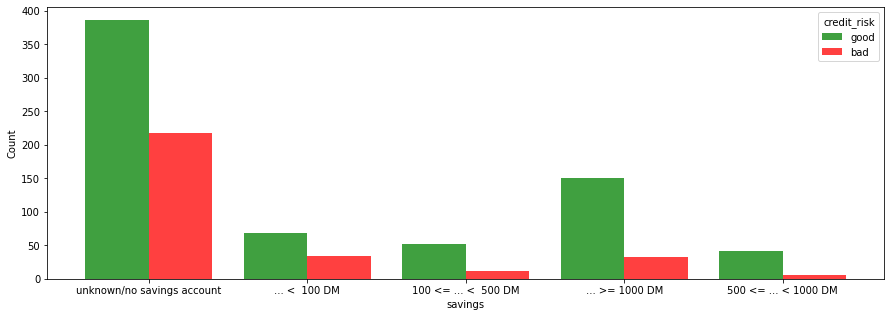

In [13]:
plt.figure(figsize=(15, 5))
sns.histplot(data=data, x="savings", hue="credit_risk", multiple="dodge", shrink=.8, palette=['green', 'red'], linewidth=0);

Видно, что во всех категорих количество одобренных запросов преобладает над количеством отказов. Очень сильное различие для клиентов со сберегательным счетом в категории `...>= 1000 DM` (это и логично, так как банку не выгодно отказывать таким клиентам). Если посмотреть на первую группу (1ая колонка на графике), то видно, что процент отказов в этой категории довольно высок (это тоже понятно, так как банку нужно проверить таких клиентов на платежеспасобность и это тоже может вызвать свои трудности)

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

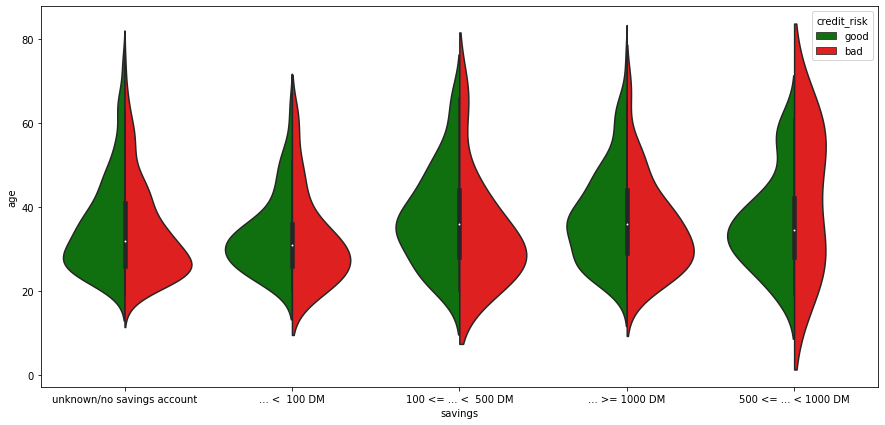

In [14]:
plt.figure(figsize=(15, 7))
sns.violinplot(data=data, x="savings", y='age', hue="credit_risk", palette=['green', 'red'], split=True);

Во всех категорих, кроме последней, средний возраст в среднем находится окло 20 и 40, прием, чем выше катенория сберегательно счета, тем сильнее среднее смещается в сторону более высокого возраста (среднее возраста по отказам примерно одинаково, но в последнем случае сильно размазано по практически всему диапазону возрастов). Это можно объяснить тем, что при большем возрасте у клиентов (в среднем) становится больше денег (так как у него появляется постоянная работа и появляются какие-то накопления). Могу предположить, что для последней категории клиентов (в терминах сберегательного счета) процент отказов для велик, так как компания беспокоится о постоянной платежеспособности таких престарелых клиентов (и ей просто не выгодно одобрять запрос, даже если у клиента имелись большие накопления). 

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

In [15]:
data['credit_risk'].unique()

array(['good', 'bad'], dtype=object)

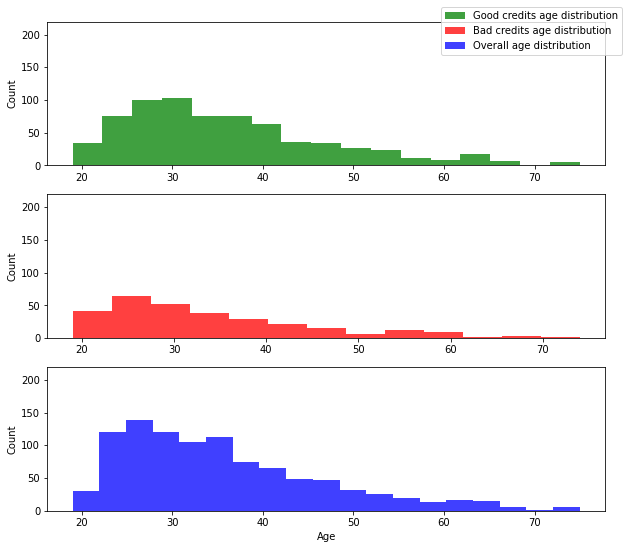

In [16]:
f, axes = plt.subplots(3, 1, figsize=(10, 9))
mask = data['credit_risk'] == 'good'


sns.histplot(x=data[mask]['age'], ax=axes[0], color='green', linewidth=0, label='Good credits age distribution')
axes[0].set(xlabel=None)
axes[0].set_ylim(0, 220)
sns.histplot(x=data[~mask]['age'], ax=axes[1], color='red', linewidth=0, label='Bad credits age distribution')
axes[1].set(xlabel=None)
axes[1].set_ylim(0, 220)
sns.histplot(x=data['age'], ax=axes[2], color='blue', linewidth=0, label='Overall age distribution')
axes[2].set(xlabel='Age')
axes[2].set_ylim(0, 220)

f.legend(loc='upper right', bbox_to_anchor=(0.93, 0.91), fancybox=True);

Видно, что пик одобрений приходится где-то на 30 лет, а пик отказов заметно раньше - на 25 - 27 лет.

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

Text(0, 0.5, 'Duration')

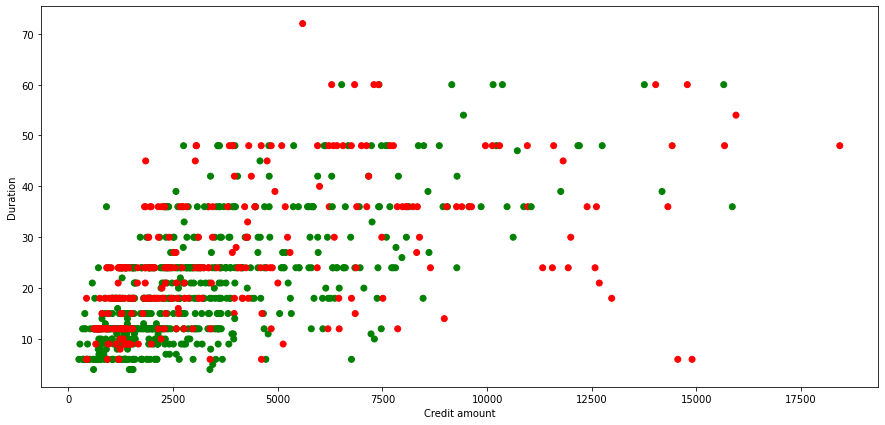

In [17]:
plt.figure(figsize=(15, 7))
plt.scatter(data['amount'], data['duration'], c=['green' if i=='good' else 'red' for i in data['credit_risk']])
plt.xlabel('Credit amount')
plt.ylabel('Duration')

Можно заметить, что в начале корреляция этих признаков положительна.

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

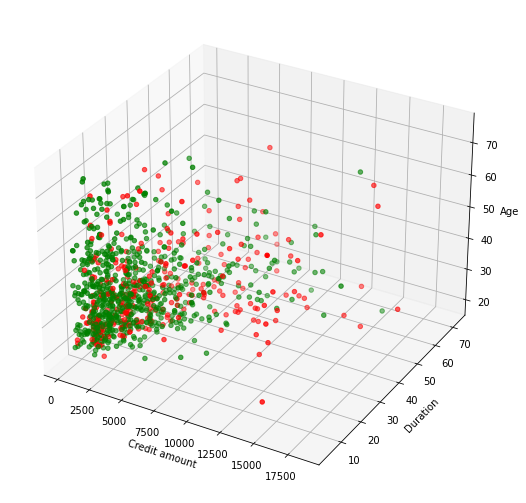

In [18]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(projection='3d')
ax.scatter(data['amount'], data['duration'], data['age'], c=['green' if i=='good' else 'red' for i in data['credit_risk']])
ax.set_xlabel('Credit amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age');

Можно увидеть, что наибольшая кучность приходится на небоьшие значения длительности и сумм причем для этих значений разброс возраста довольно высок.

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [19]:
data.drop(columns=categorical, inplace=True)

In [20]:
for name in binars:
    data[name] = data[name].map(dict(zip(data[name].unique(), [0, 1])))

In [21]:
data.employment_duration = data.employment_duration.map({'unemployed': 0,
                                                         '< 1 yr': 1,
                                                         '1 <= ... < 4 yrs': 2,
                                                         '4 <= ... < 7 yrs': 3,
                                                         '>= 7 yrs': 4})

data.installment_rate = data.installment_rate.map(dict(zip(data.installment_rate.unique(), range(len(data.installment_rate.unique())))))

data.savings = data.savings.map(dict(zip(data.savings.unique(), range(len(data.savings.unique())))))

data.present_residence = data.present_residence.map({'< 1 yr': 0,
                                                     '1 <= ... < 4 yrs': 1,
                                                     '4 <= ... < 7 yrs': 2,
                                                     '>= 7 yrs': 3})

data.people_liable = data.people_liable.map(dict(zip(data.people_liable.unique(), range(len(data.people_liable.unique())))))
data.number_credits = data.number_credits.map(dict(zip(data.number_credits.unique(), range(len(data.number_credits.unique())))))


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

Напишем градиентный спуск для логистической регрессии:
$$p=\frac{1}{1 + e^{-\langle w, x_i\rangle}} = \sigma(\langle w, x_i\rangle)$$

функция ошибки: 
$$L(w, X, y) = -\sum_i \big( y_i \log(\sigma(\langle w, x_i \rangle)) + (1 - y_i) \log(\sigma(-\langle w, x_i \rangle)) \big)$$

шаг градиентного спуска (с точностью до нормировки): 

$$\nabla_w L(y, X, w) = -\sum_{i=0}^{m} x_i \big( y_i - \sigma(\langle w, x_i \rangle)) \big)$$

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler


def get_best_weights(Xtrain, y_train, alpha=0.03, num_iters=500):
    X_train = Xtrain.copy()
    X_train = np.hstack((X_train, np.ones(X_train.shape[0]).reshape(-1, 1)))

    w = np.zeros(X_train.shape[1])
    w_prev = np.zeros(X_train.shape[1])
    sigmoid = lambda x: 1 / (1 + np.exp(-x))
    for i in range(num_iters):
        w_prev = w.copy()
        error = y_train - sigmoid(X_train @ w)
        gradient = X_train.T @ error

        w += alpha * gradient / X_train.shape[0]
        if np.linalg.norm(w - w_prev) < 1e-3:
            break
    return w


def pred(w: np.ndarray, Xtest: np.ndarray):
    sigmoid = lambda z: 1 / (1 + np.exp(-z))
    X_test = Xtest.copy()
    X_test = np.hstack((X_test, np.ones(X_test.shape[0]).reshape(-1, 1)))

    predictions = sigmoid(np.dot(X_test, w))
    return np.asarray(list(map(lambda x: 1 if x >= 0.5 else 0, predictions)))



X = data.drop(columns=['credit_risk']).values
y = data['credit_risk'].values


norm = StandardScaler()
df_data_norm = pd.DataFrame(data=norm.fit_transform(X))


X_train, X_test, y_train, y_test = train_test_split(df_data_norm, y, test_size=0.25, random_state=10)

w = get_best_weights(X_train, y_train)
print(classification_report(y_test, pred(w, X_test)))

              precision    recall  f1-score   support

           0       0.70      0.92      0.80       165
           1       0.62      0.25      0.35        85

    accuracy                           0.69       250
   macro avg       0.66      0.58      0.58       250
weighted avg       0.67      0.69      0.65       250

